# Assignment - Advanced Regression

## Regularization

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1: Data Understanding, Preparation and EDA

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe() #statistical data of numerical variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Handling Missing Values

In [9]:
#Lets drop ID columns, as its a redundant column.

data = data.drop(['Id'], axis=1)

<Axes: >

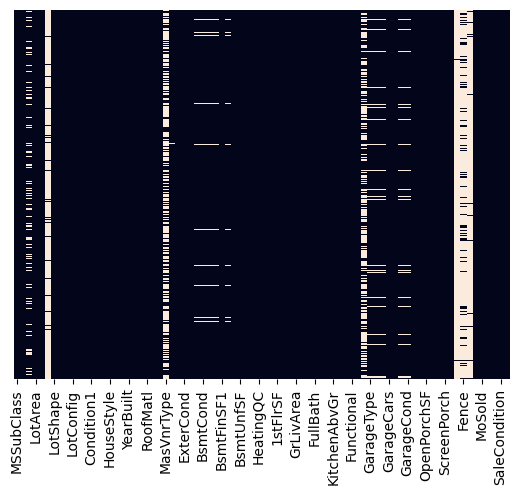

In [10]:
#Visualizing missing values by using heatmap.

sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

**Based on above plot, we can visualize that there are high missing values in some of columns. Lets check the percentage of missing values of each features.**

In [11]:
missing_values = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
missing_values.head()

,Null %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73


**The above features are top contributors of more number of missing values, Lets understand the total missing values of each features.**

In [12]:
# dataframe with features having null values
NA_data = missing_values[missing_values["Null %"] > 0]
NA_data

,Null %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [13]:
 #Dropping'PoolQC','MiscFeature','Alley','Fence','MasVnrType'.'FireplaceQu'column as they are top contributors of more number of missing values

data = data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

<Axes: >

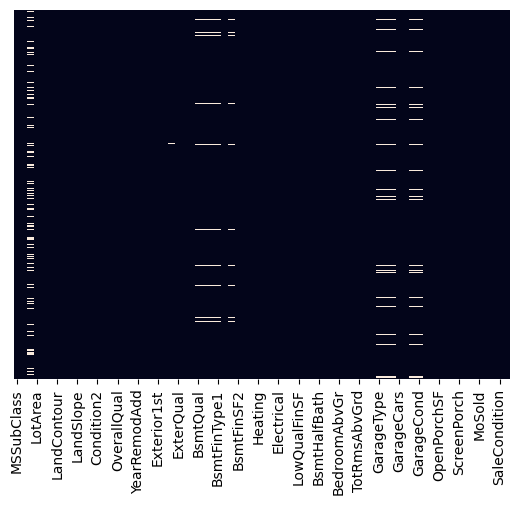

In [14]:
#Lets visualize the features once again

sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [15]:
#Lets check the percentage of missing values in remaining columns.

missing_values = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
NA_data = missing_values[missing_values["Null %"] > 0]
NA_data

,Null %
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53
BsmtFinType1,2.53


**Dropped features with very high missing values, now lets handle missing values of the remaining features.**

In [16]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

#### Lets check catagorical & Numerical features

In [17]:
#Categorical columns
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
# Numeric columns
data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Now, we know which are catagorical & numeric features, based on this lets impute missing values with mean & mode accordingly.

#### Imputing missing values

In [19]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])

data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])

data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])

data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])

data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])

data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

In [20]:
#chekcing if values are imputed for all features.

data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [21]:
#checking for the presence of any more missing values

data.isnull().values.any()

False

In [22]:
data.shape

(1460, 74)

**Columns reduced to 74 from 81**

In [23]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Outliers treatment

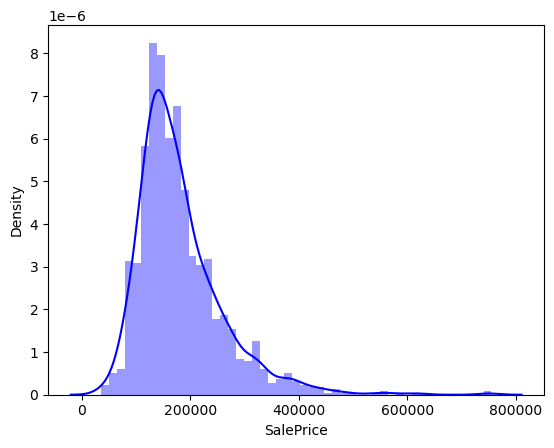

In [24]:
# Sale columns
plt.figure()
sns.distplot(data['SalePrice'],color='b')
plt.show()

In [25]:
# Removing outliers including target variable
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = data[num_cols].quantile(0.05)
Q3 = data[num_cols].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[num_cols] < (Q1 - 1.5 * IQR)) |(data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Removed 5th percentile (Q1) and 95th percentile (Q2) for ach numerical variables which ensures removing extreme values.**

In [26]:
data.shape

(1333, 74)

#### Dummy Variable for catagorical variables

In [27]:
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

**By using Label encoding, transformed all catagorical variables to numbreical variables**

In [29]:
data.shape

(1333, 74)

In [30]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,35,304,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,385
1,0,3,51,466,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,315
2,5,3,38,660,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,414
3,6,3,30,457,1,0,3,0,0,0,...,99,0,0,0,0,1,0,8,0,180
4,5,3,55,873,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,32,209,1,3,3,0,4,0,...,0,0,0,0,0,9,3,8,4,326
1455,5,3,32,245,1,3,3,0,4,0,...,0,0,0,0,0,7,1,8,4,291
1456,0,3,56,815,1,3,3,0,4,0,...,0,0,0,0,0,1,4,8,4,388
1457,6,3,36,388,1,3,3,0,4,0,...,0,0,0,0,16,4,4,8,4,497


## Step 2 : Splitting the data into train and test sets

In [31]:
#Split the data into train and test
y = data.pop('SalePrice')
y.head()

0    385
1    315
2    414
3    180
4    465
Name: SalePrice, dtype: int64

In [32]:
X = data
X.shape

(1333, 73)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,5,3,41,260,1,3,3,0,4,0,...,34,0,0,0,0,0,10,1,8,0
745,5,3,41,376,1,0,3,0,4,0,...,149,0,0,0,0,0,6,2,8,4
1134,5,3,27,348,1,0,1,0,4,0,...,24,0,0,0,0,0,7,1,8,4
512,0,3,40,395,1,3,3,0,0,0,...,0,0,0,0,0,0,6,0,8,4
43,0,3,41,410,1,0,3,0,1,0,...,0,0,0,0,0,0,6,2,8,4


In [35]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (893, 73)
X_test shape (440, 73)
y_train shape (893,)
y_test shape (440,)


## Step 3 : Scaling of numeric varaibles

In [36]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [37]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1108,5,41,260,5,4,96,50,0,0,0,...,1,84,2,151,42,34,0,0,10,1
745,5,41,376,7,8,72,46,187,267,8,...,2,78,2,365,0,149,0,0,6,2
1134,5,27,348,5,4,93,47,0,0,0,...,1,81,2,148,42,24,0,0,7,1
512,0,40,395,4,4,54,8,0,230,34,...,0,48,2,270,0,0,0,0,6,0
43,0,41,410,4,5,71,30,0,90,84,...,0,61,1,56,75,0,0,0,6,2


In [38]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,3.796193,3.013438,39.805151,455.704367,0.995521,1.931691,2.797312,0.001120,3.035834,0.061590,...,33.678611,7.572228,0.167973,2.283315,0.005599,0.241881,5.235162,1.835386,7.507279,3.810750
std,4.034452,0.635143,18.892429,282.543242,0.066815,1.414544,0.673251,0.033464,1.608154,0.267048,...,44.703517,21.528545,1.385707,9.078588,0.120593,1.529879,2.728075,1.347977,1.574461,1.052978
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,30.000000,214.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,8.000000,4.000000
50%,4.000000,3.000000,41.000000,434.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,8.000000,4.000000
75%,5.000000,3.000000,49.000000,689.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,8.000000,4.000000
max,14.000000,4.000000,105.000000,990.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,185.000000,109.000000,18.000000,67.000000,3.000000,16.000000,11.000000,4.000000,8.000000,5.000000


In [39]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,5,3,41,260,1,3,3,0,4,0,...,34,0,0,0,0,0,10,1,8,0
745,5,3,41,376,1,0,3,0,4,0,...,149,0,0,0,0,0,6,2,8,4
1134,5,3,27,348,1,0,1,0,4,0,...,24,0,0,0,0,0,7,1,8,4
512,0,3,40,395,1,3,3,0,0,0,...,0,0,0,0,0,0,6,0,8,4
43,0,3,41,410,1,0,3,0,1,0,...,0,0,0,0,0,0,6,2,8,4


In [40]:
#Scaling using MinMax

scaler=MinMaxScaler()

In [41]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [42]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,0.357143,3,0.390476,0.261134,1,3,3,0,4,0,...,0.183784,0.0,0,0.0,0,0,0.909091,0.25,8,0
745,0.357143,3,0.390476,0.378543,1,0,3,0,4,0,...,0.805405,0.0,0,0.0,0,0,0.545455,0.50,8,4
1134,0.357143,3,0.257143,0.350202,1,0,1,0,4,0,...,0.129730,0.0,0,0.0,0,0,0.636364,0.25,8,4
512,0.000000,3,0.380952,0.397773,1,3,3,0,0,0,...,0.000000,0.0,0,0.0,0,0,0.545455,0.00,8,4
43,0.000000,3,0.390476,0.412955,1,0,3,0,1,0,...,0.000000,0.0,0,0.0,0,0,0.545455,0.50,8,4


In [43]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
990,0.357143,3,0.504762,0.444332,1,3,3,0,4,0,...,0.302703,0.000000,0,0.0,0,0,0.454545,0.00,8,4
1161,0.000000,3,0.390476,0.899798,1,0,2,0,1,0,...,0.000000,0.000000,11,0.0,0,0,0.909091,0.50,8,4
1369,0.000000,3,0.171429,0.594130,1,1,3,0,2,0,...,0.929730,0.000000,0,0.0,0,0,0.363636,1.00,8,4
329,0.428571,4,0.285714,0.143725,1,3,3,0,0,0,...,0.000000,0.422018,0,0.0,0,0,0.545455,0.75,8,4
262,0.571429,3,0.561905,0.308704,1,0,3,0,0,0,...,0.016216,0.000000,0,0.0,0,0,0.545455,0.00,8,4


In [44]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.00000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.271157,3.013438,0.379097,0.459215,0.995521,1.931691,2.797312,0.001120,3.035834,0.061590,...,0.182047,0.06947,0.167973,0.034079,0.005599,0.241881,0.475924,0.458847,7.507279,3.810750
std,0.288175,0.635143,0.179928,0.285975,0.066815,1.414544,0.673251,0.033464,1.608154,0.267048,...,0.241641,0.19751,1.385707,0.135501,0.120593,1.529879,0.248007,0.336994,1.574461,1.052978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.285714,0.214575,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,8.000000,4.000000
50%,0.285714,3.000000,0.390476,0.437247,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.081081,0.00000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,8.000000,4.000000
75%,0.357143,3.000000,0.466667,0.695344,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.281081,0.00000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,8.000000,4.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,1.000000,1.00000,18.000000,1.000000,3.000000,16.000000,1.000000,1.000000,8.000000,5.000000


In [45]:
X_train.shape

(893, 73)

## Step 4 : Model Building

### Linear Regression

In [46]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-215.67858488888044
[ 4.45421278e+00 -1.30606055e+01  7.86517133e+00  3.13727389e+01
  8.22021196e+01 -1.44325906e+00 -4.09995961e+00 -6.55690713e+01
 -1.08075582e+00  3.71229894e+00 -3.34598895e-01  1.12173292e+00
  3.34743851e+00 -5.51072872e+00 -9.73207984e-01  1.97905390e+02
  1.04237758e+02  9.84435326e+01  1.82894224e+01 -3.30767036e-01
  1.71954259e+00 -2.01900988e+00  1.38313226e+00  5.33561057e+00
 -1.21794917e+01  2.57013780e+00  6.15174202e+00 -1.07773084e+00
  1.19679681e+00 -2.80814972e+00 -5.93572696e-01  2.61344323e+01
  6.15684271e-01  1.03313733e+00  3.94333882e+00  5.85817568e+01
 -5.55034497e+00 -2.30453655e+00 -1.28105416e+01  1.52872553e-01
  6.52795265e+01  7.80231556e+01 -6.39488462e-14  1.18767067e+02
  3.03185666e+01  9.42257928e+00  4.70315220e+01 -1.72258395e+00
 -6.60079040e+01  2.13162821e-14 -2.26235559e+00  2.76488640e+01
  9.57521035e+00  2.51338782e+01 -5.02290437e-01 -1.58980891e+01
 -4.26484788e+00  2.99442800e+01  2.77184469e+01 -4.79650446e+00
  4.5

In [48]:
#Checking r2score
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

0.9275430637749422
0.9255922476849684


In [49]:
#Cheking RSS
rss_train = np.sum(np.square(y_train - y_pred_train))
print(rss_train)
metric.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print(rss_test)
metric.append(rss_test)


1613198.0202733586
875910.112933585


In [50]:
#Checking MSE & RMSE

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


1806.4927438671427
1990.704802121784


### Ridge Regression

In [51]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.7}
-34.05069763039404


In [53]:
alpha = 0.8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 6.23384214e+00, -1.27928591e+01,  7.58204984e+00,  3.03446737e+01,
        6.77462078e+01, -1.59933941e+00, -4.10350749e+00, -3.21676644e+01,
       -1.08425691e+00,  2.66377846e+00, -3.14274829e-01,  9.95081099e-01,
        4.18508483e+00, -5.65338636e+00, -8.91581026e-01,  1.77960696e+02,
        9.55714506e+01,  8.86254199e+01,  2.08691455e+01, -5.30813079e-02,
        3.09449150e+00, -2.08377152e+00,  1.45124587e+00,  5.97256110e+00,
       -1.31196817e+01,  2.56372556e+00,  6.69271101e+00, -1.97416750e+00,
        1.32844711e+00, -2.83318775e+00, -6.84838810e-01,  2.84659116e+01,
        5.03098735e-01,  8.45083544e-01,  6.35148356e+00,  5.89534968e+01,
       -4.68566432e+00, -2.49047351e+00, -9.03401840e+00,  4.73671699e-01,
        6.50420103e+01,  7.66001578e+01,  0.00000000e+00,  1.16647828e+02,
        2.91987920e+01,  7.31894479e+00,  4.85178739e+01,  2.01982284e-01,
       -5.49844877e+01,  0.00000000e+00, -2.91699045e+00,  2.50416374e+01,
        9.80709904e+00,  

In [54]:
#Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge Regression

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train1 = r2_score(y_train, y_pred_train)
print(r2_train1)
metric2.append(r2_train1)

r2_test1 = r2_score(y_test, y_pred_test)
print(r2_test1)
metric2.append(r2_test1)

rss_train1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train1)
metric2.append(rss_train1)

rss_test1 = np.sum(np.square(y_test - y_pred_test))
print(rss_test1)
metric2.append(rss_test1)

mse_train1 = mean_squared_error(y_train, y_pred_train)
print(mse_train1)
metric2.append(mse_train1**0.5)

mse_test1 = mean_squared_error(y_test, y_pred_test)
print(mse_test1)
metric2.append(mse_test1**0.5)


0.9272413847548139
0.9264671158465373
1619914.6718927054
865611.3759557845
1814.0141902493901
1967.298581717692


### Lasso Regression

In [55]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.2}
-33.78287642080542


In [57]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [58]:
lasso.coef_

array([  3.80327028, -13.02221445,   7.54956801,  31.19686483,
        78.9659863 ,  -1.4562364 ,  -4.06293096, -54.12471562,
        -1.07908569,   3.45693512,  -0.3357518 ,   1.06165519,
         2.90566875,  -5.40351998,  -0.89853815, 197.79075641,
       103.0770382 ,  96.27961402,  18.34976878,  -0.27162671,
         1.77480526,  -2.00919172,   1.38304416,   5.01630122,
       -12.2454625 ,   2.47648975,   6.09291991,  -1.2123203 ,
         1.17873326,  -2.87706517,  -0.60565223,  25.18490685,
         0.52462093,  -0.        ,   2.5178721 ,  60.39164833,
        -4.99365307,  -2.32830838, -11.86732254,   0.2362829 ,
        64.49633544,  77.27888846,   0.        , 120.08845573,
        29.91103982,   8.09588971,  46.58313853,  -1.13118692,
       -63.44272517,   0.        ,  -2.30729421,  25.68869789,
         9.59101049,  25.12154382,  -0.51550118, -14.63113684,
        -4.31251479,  29.53355375,  27.58462508,  -4.76618106,
         4.46655665,   3.51587582,  14.64039746,  14.96

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train2 = r2_score(y_train, y_pred_train)
print(r2_train2)
metric3.append(r2_train2)

r2_test2 = r2_score(y_test, y_pred_test)
print(r2_test2)
metric3.append(r2_test2)

rss_train2 = np.sum(np.square(y_train - y_pred_train))
print(rss_train2)
metric3.append(rss_train2)

rss_test2 = np.sum(np.square(y_test - y_pred_test))
print(rss_test2)
metric3.append(rss_test2)

mse_train2 = mean_squared_error(y_train, y_pred_train)
print(mse_train2)
metric3.append(mse_train2**0.5)

mse_test2 = mean_squared_error(y_test, y_pred_test)
print(mse_test2)
metric3.append(mse_test2**0.5)


0.9275291626093967
0.925882754214647
1613507.519044709
872490.3401370426
1806.839327037748
1982.9325912205513


**The r2 score is slightly better in Lasso Regression than Ridge Regression**

In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.275431e-01,9.272414e-01,9.275292e-01
1,R2 Score (Test),9.255922e-01,9.264671e-01,9.258828e-01
2,RSS (Train),1.613198e+06,1.619915e+06,1.613508e+06
3,RSS (Test),8.759101e+05,8.656114e+05,8.724903e+05
4,MSE (Train),4.250286e+01,4.259125e+01,4.250693e+01
5,MSE (Test),4.461732e+01,4.435424e+01,4.453013e+01


## Step 5: Model Evaluation

In [61]:
ridge_pred = ridge.predict(X_test)

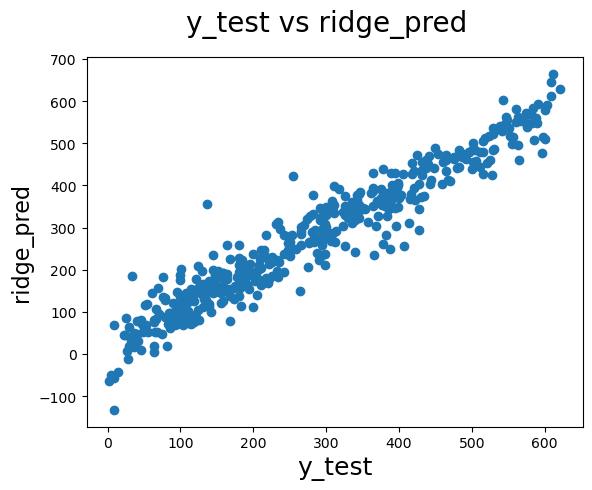

In [62]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

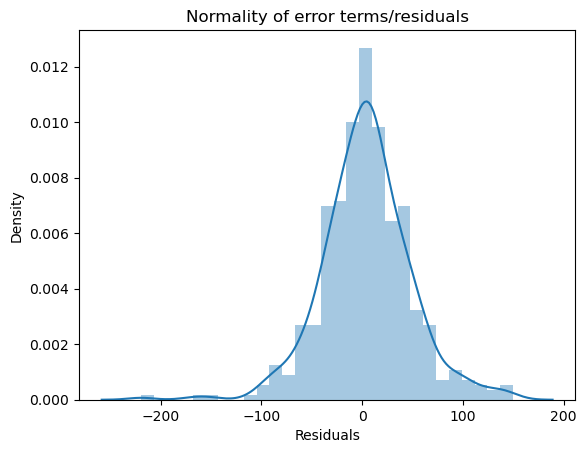

In [63]:
# Distribution of errors
y_res=y_test-ridge_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [64]:
lasso_pred = lasso.predict(X_test)

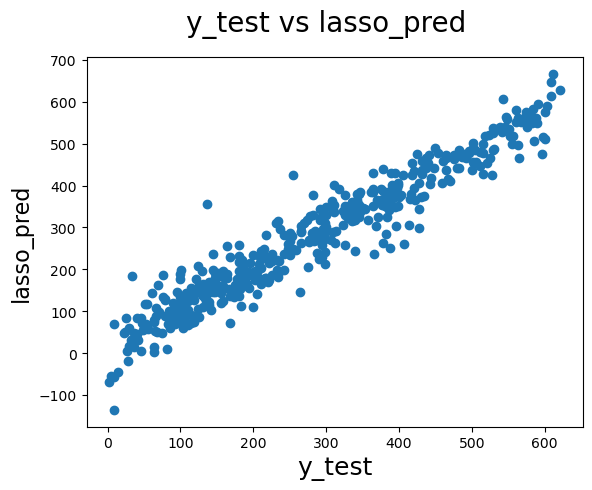

In [65]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

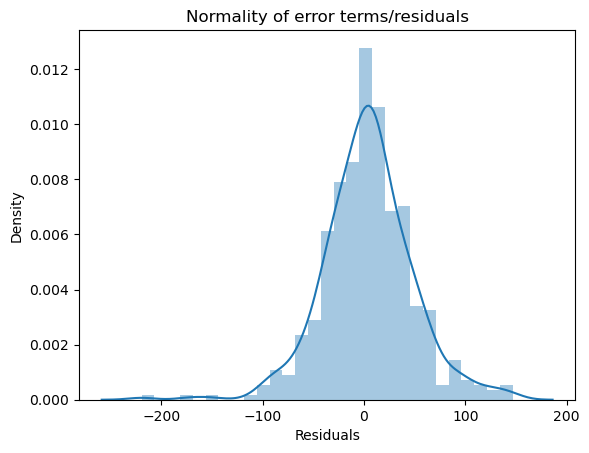

In [66]:
#Distribution of errors
y_res=y_test-lasso_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Observe the changes in the coefficients after regularization

In [67]:
betas = pd.DataFrame(index=X_train.columns)

In [68]:
betas.rows = X_train.columns

In [69]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,6.233842,3.803270
MSZoning,-12.792859,-13.022214
LotFrontage,7.582050,7.549568
LotArea,30.344674,31.196865
Street,67.746208,78.965986
LotShape,-1.599339,-1.456236
LandContour,-4.103507,-4.062931
Utilities,-32.167664,-54.124716
LotConfig,-1.084257,-1.079086
LandSlope,2.663778,3.456935


In [71]:
#Sorting columns with high coefficients for Ridge and Lasso
numeric_columns = betas.select_dtypes(include=['number']).columns

for column in numeric_columns:
    betas = betas.sort_values(by=column, ascending=False)

betas.head(68)

,Ridge,Lasso
OverallQual,177.960696,197.790756
GrLivArea,116.647828,120.088456
OverallCond,95.571451,103.077038
YearBuilt,88.625420,96.279614
Street,67.746208,78.965986
2ndFlrSF,76.600158,77.278888
1stFlrSF,65.042010,64.496335
TotalBsmtSF,58.953497,60.391648
FullBath,48.517874,46.583139
PoolArea,36.219174,38.352826


### Solving subjective questions
_PDF version of subjective questions & answers submitted seperatly._

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Optimal alpha value:
    
    - Ridge Alpha : 0.8
    - Lasso Alpha : 0.01

In [72]:
#Rigde Regresssion with double of opmital value

alpha1 = 1.6 # Optimal value 0.8*2
ridge2 = Ridge(alpha=alpha1)
ridge2.fit(X_train, y_train)
ridge2.coef_

array([ 7.19897065e+00, -1.25651025e+01,  7.21887610e+00,  2.96585033e+01,
        5.79629526e+01, -1.73925226e+00, -4.13573998e+00, -2.09930401e+01,
       -1.10098165e+00,  1.93521560e+00, -2.90120698e-01,  9.12485338e-01,
        4.59035634e+00, -5.69306624e+00, -7.66835366e-01,  1.62251293e+02,
        8.83025626e+01,  8.08908627e+01,  2.28438816e+01,  1.36319661e-01,
        4.07077268e+00, -2.13544769e+00,  1.50672856e+00,  6.69070274e+00,
       -1.38860505e+01,  2.57250012e+00,  7.16251528e+00, -2.64203584e+00,
        1.42378156e+00, -2.84334428e+00, -7.72009534e-01,  3.01435980e+01,
        4.72024809e-01,  1.00896719e+00,  8.22722446e+00,  5.86551608e+01,
       -4.04867054e+00, -2.65266780e+00, -6.04741617e+00,  6.74519771e-01,
        6.49205052e+01,  7.51448795e+01,  0.00000000e+00,  1.14574145e+02,
        2.82818826e+01,  6.10706269e+00,  4.92172021e+01,  1.54451239e+00,
       -4.65867367e+01,  0.00000000e+00, -3.49544159e+00,  2.40293390e+01,
        1.00041352e+01,  

In [73]:
#Lets calculate some metrics such as R2 score, RSS and RMSE on Ridge Regression

y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train1 = r2_score(y_train, y_pred_train)
print(r2_train1)
metric2.append(r2_train1)

r2_test1 = r2_score(y_test, y_pred_test)
print(r2_test1)
metric2.append(r2_test1)

rss_train1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train1)
metric2.append(rss_train1)

rss_test1 = np.sum(np.square(y_test - y_pred_test))
print(rss_test1)
metric2.append(rss_test1)

mse_train1 = mean_squared_error(y_train, y_pred_train)
print(mse_train1)
metric2.append(mse_train1**0.5)

mse_test1 = mean_squared_error(y_test, y_pred_test)
print(mse_test1)
metric2.append(mse_test1**0.5)

0.9266317014838319
0.9267824465962079
1633488.801534166
861899.3784291563
1829.2147833529295
1958.862223702628


r2_score values for ridge regression with optimal value : 0.8 <br>
**r2_score train : 0.9272413847548139 <br>
r2_score test  : 0.9264671158465373** 


In [74]:
#Lasso Regression with double of optimal value

alpha2 = 0.02 #optimal value 0.01*2

lasso2 = Lasso(alpha=alpha2)
        
lasso2.fit(X_train, y_train) 

lasso2.coef_

array([  3.16938213, -12.98740344,   7.17545856,  31.03917401,
        75.86157282,  -1.46773534,  -4.02370912, -42.95202969,
        -1.07823505,   3.21358569,  -0.33779553,   1.00356382,
         2.36907969,  -5.3031813 ,  -0.82983933, 197.6667295 ,
       101.93379793,  94.20775621,  18.42634781,  -0.21335584,
         1.80259219,  -1.99621528,   1.38058152,   4.74821241,
       -12.3131399 ,   2.3811951 ,   6.04666281,  -1.35043325,
         1.16008389,  -2.95014465,  -0.61130208,  24.74869791,
         0.54004493,  -0.        ,   1.60004704,  61.64835041,
        -4.43577789,  -2.34649715, -10.92815107,   0.31711604,
        63.7992703 ,  76.61719722,   0.        , 121.30877215,
        29.4205997 ,   6.72664431,  46.08713789,  -0.58974694,
       -60.92680543,   0.        ,  -2.35929857,  23.72136749,
         9.60245858,  25.1290227 ,  -0.53053451, -13.40025085,
        -4.35822321,  29.14278418,  27.47073869,  -4.74165468,
         4.39308044,   3.56796522,  14.44361611,  14.77

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train2 = r2_score(y_train, y_pred_train)
print(r2_train2)
metric3.append(r2_train2)

r2_test2 = r2_score(y_test, y_pred_test)
print(r2_test2)
metric3.append(r2_test2)

rss_train2 = np.sum(np.square(y_train - y_pred_train))
print(rss_train2)
metric3.append(rss_train2)

rss_test2 = np.sum(np.square(y_test - y_pred_test))
print(rss_test2)
metric3.append(rss_test2)

mse_train2 = mean_squared_error(y_train, y_pred_train)
print(mse_train2)
metric3.append(mse_train2**0.5)

mse_test2 = mean_squared_error(y_test, y_pred_test)
print(mse_test2)
metric3.append(mse_test2**0.5)

0.9274886155342098
0.9261298985411623
1614410.2685236011
869581.0167370788
1807.8502447072801
1976.32049258427


r2_score values for lasso regression with optimal value : 0.01 <br>
**r2_score train : 0.9275291626093967 <br>
r2-score test  : 0.925882754214647** 

In [76]:
#Compare coefficents of both optimal value and double of optimal value
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_

pd.set_option('display.max_rows', None)

numeric_columns = betas.select_dtypes(include=['number']).columns

for column in numeric_columns:
    betas = betas.sort_values(by=column, ascending=False)

betas.head(68)

,Ridge,Ridge2,Lasso,Lasso2
OverallQual,177.960696,162.251293,197.790756,197.666730
GrLivArea,116.647828,114.574145,120.088456,121.308772
OverallCond,95.571451,88.302563,103.077038,101.933798
YearBuilt,88.625420,80.890863,96.279614,94.207756
2ndFlrSF,76.600158,75.144879,77.278888,76.617197
Street,67.746208,57.962953,78.965986,75.861573
1stFlrSF,65.042010,64.920505,64.496335,63.799270
TotalBsmtSF,58.953497,58.655161,60.391648,61.648350
FullBath,48.517874,49.217202,46.583139,46.087138
PoolArea,36.219174,33.778336,38.352826,37.563253


#### Top 10 important predictor variables


<span style="color: blue;">OverallQual</span> - Rates the overall material and finish of the house <br>
<span style="color: blue;">GrLivArea</span> - Above grade (ground) living area square feet <br>
<span style="color: blue;">OverallCond</span> - Rates the overall condition of the house <br>
<span style="color: blue;">YearBuilt</span> - Original construction date <br>
<span style="color: blue;">2ndFlrSF</span> - Second floor square feet     <br>
<span style="color: blue;">Street</span> - Type of road access to property <br>
<span style="color: blue;">1stFlrSF</span> - First Floor square feet       <br>
<span style="color: blue;">TotalBsmtSF</span> - Total square feet of basement area <br>
<span style="color: blue;">FullBath</span> - Full bathrooms above grade  
<span style="color: blue;">PoolArea</span> - Lot size in square feet    <br>
    

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [77]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,0.357143,3,0.390476,0.261134,1,3,3,0,4,0,...,0.183784,0.000000,0,0.000000,0,0,0.909091,0.25,8,0
745,0.357143,3,0.390476,0.378543,1,0,3,0,4,0,...,0.805405,0.000000,0,0.000000,0,0,0.545455,0.50,8,4
1134,0.357143,3,0.257143,0.350202,1,0,1,0,4,0,...,0.129730,0.000000,0,0.000000,0,0,0.636364,0.25,8,4
512,0.000000,3,0.380952,0.397773,1,3,3,0,0,0,...,0.000000,0.000000,0,0.000000,0,0,0.545455,0.00,8,4
43,0.000000,3,0.390476,0.412955,1,0,3,0,1,0,...,0.000000,0.000000,0,0.000000,0,0,0.545455,0.50,8,4
33,0.000000,3,0.380952,0.582996,1,0,3,0,4,0,...,0.129730,0.000000,0,0.000000,0,0,0.272727,1.00,8,4
269,0.000000,3,0.390476,0.245951,1,0,3,0,0,0,...,0.097297,0.000000,0,0.000000,0,0,0.363636,0.25,8,4
789,0.357143,3,0.390476,0.757085,1,0,2,0,4,0,...,0.702703,0.000000,0,0.000000,0,0,0.545455,0.25,8,4
1038,0.857143,4,0.000000,0.002024,1,3,3,0,4,0,...,0.000000,0.000000,0,0.000000,0,0,0.363636,0.75,8,4
151,0.000000,3,0.742857,0.864372,1,3,3,0,4,0,...,0.454054,0.000000,0,0.000000,0,0,0.000000,0.50,6,5


In [78]:
y_train

1108    313
745     534
1134    271
512     138
43      140
33      262
269     202
789     336
1038     57
151     585
344      36
1218     27
1040    225
688     596
1289    519
1459    201
1448     90
733     143
3       180
123     221
812       7
1258    343
929     411
1348    398
692     567
1014    106
412     411
1425    184
497     323
603     214
348     222
481     587
484     147
1184    333
353      73
1415    293
1000     29
5       186
112     593
465     302
859     465
687     204
1254    261
783     262
464     121
1102    158
1192    124
677      84
1193    259
841     232
252     284
622     158
711      67
861     144
604     409
73      193
926     524
75       46
1327    141
234     401
14      231
686     423
882     300
331     174
624     260
578     197
1033    428
1312    536
1087    468
1392    118
1337      5
1383     90
577     255
1313    566
1413    478
1363    230
1001     39
302     378
630     121
397     272
2       414
6       541
345     181
821 

In [79]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

**Dropping top 5 predictor variables**

OverallQual <br> GrLivArea <br> YearBuilt <br> OverallCond <br> 2ndFlrSF

In [80]:
X_train2 = X_train.drop(['OverallQual', 'GrLivArea', 'YearBuilt','OverallCond', '2ndFlrSF'], axis=1)
X_test2 = X_test.drop(['OverallQual', 'GrLivArea', 'YearBuilt','OverallCond', '2ndFlrSF'], axis=1)

In [81]:
X_train2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,0.357143,3,0.390476,0.261134,1,3,3,0,4,0,...,0.183784,0.0,0,0.0,0,0,0.909091,0.25,8,0
745,0.357143,3,0.390476,0.378543,1,0,3,0,4,0,...,0.805405,0.0,0,0.0,0,0,0.545455,0.50,8,4
1134,0.357143,3,0.257143,0.350202,1,0,1,0,4,0,...,0.129730,0.0,0,0.0,0,0,0.636364,0.25,8,4
512,0.000000,3,0.380952,0.397773,1,3,3,0,0,0,...,0.000000,0.0,0,0.0,0,0,0.545455,0.00,8,4
43,0.000000,3,0.390476,0.412955,1,0,3,0,1,0,...,0.000000,0.0,0,0.0,0,0,0.545455,0.50,8,4


In [82]:
X_test2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
990,0.357143,3,0.504762,0.444332,1,3,3,0,4,0,...,0.302703,0.000000,0,0.0,0,0,0.454545,0.00,8,4
1161,0.000000,3,0.390476,0.899798,1,0,2,0,1,0,...,0.000000,0.000000,11,0.0,0,0,0.909091,0.50,8,4
1369,0.000000,3,0.171429,0.594130,1,1,3,0,2,0,...,0.929730,0.000000,0,0.0,0,0,0.363636,1.00,8,4
329,0.428571,4,0.285714,0.143725,1,3,3,0,0,0,...,0.000000,0.422018,0,0.0,0,0,0.545455,0.75,8,4
262,0.571429,3,0.561905,0.308704,1,0,3,0,0,0,...,0.016216,0.000000,0,0.0,0,0,0.545455,0.00,8,4


**Lasso Regression**

In [83]:
#Optimal aplha value
alpha_q3 = 0.01
lasso_q3 = Lasso(alpha=alpha_q3)
lasso_q3.fit(X_train2, y_train)

Lasso(alpha=0.01)

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_q3.predict(X_train2)
y_pred_test = lasso_q3.predict(X_test2)

metric3 = []
r2_train2 = r2_score(y_train, y_pred_train)
print(r2_train2)
metric3.append(r2_train2)

r2_test2 = r2_score(y_test, y_pred_test)
print(r2_test2)
metric3.append(r2_test2)

rss_train2 = np.sum(np.square(y_train - y_pred_train))
print(rss_train2)
metric3.append(rss_train2)

rss_test2 = np.sum(np.square(y_test - y_pred_test))
print(rss_test2)
metric3.append(rss_test2)

mse_train2 = mean_squared_error(y_train, y_pred_train)
print(mse_train2)
metric3.append(mse_train2**0.5)

mse_test2 = mean_squared_error(y_test, y_pred_test)
print(mse_test2)
metric3.append(mse_test2**0.5)

0.8901415562342004
0.8995655407455125
2445913.8520959243
1182290.2293239941
2738.9852767031625
2687.023248463623


**r2_score of train & test are significantly reduced after dropping top 5 important predictor variables**

In [85]:
#Compare coefficents of dropping important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train2.columns

betas['Lasso2'] = lasso_q3.coef_

numeric_columns = betas.select_dtypes(include=['number']).columns

for column in numeric_columns:
    betas = betas.sort_values(by=column, ascending=False)

betas.head(68)

,Lasso2
FullBath,154.549886
TotRmsAbvGrd,134.994614
Street,119.372291
1stFlrSF,70.516515
HalfBath,66.928721
TotalBsmtSF,65.398647
Fireplaces,49.343118
GarageArea,46.425680
YearRemodAdd,44.890345
MSSubClass,44.429993


**Top 5 most important predictor variables now:** <br>
<span style="color: blue;">FullBath<span> <br> <span style="color: blue;">TotRmsAbvGrd<span> <br>  <span style="color: blue;">Street<span> <br> <span style="color: blue;">1stFlrSF<span> <br> <span style="color: blue;">HalfBath<span>